# China Population Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

df = pd.read_csv('China_pop.csv')

## Q3.a

In [2]:
sgp_pop_SingStat=df.iloc[:,10].values
sgp_pop_worldbank=df.iloc[:,9].values
if (sgp_pop_SingStat.all()==sgp_pop_worldbank.all()):
    print("Match!")
else:
    print("Mismatch!")

Match!


In [3]:
df.isnull().any()

year                     False
pop                      False
mortality                 True
natality                  True
grow                      True
SH.STA.BASS.ZS            True
SH.STA.SMSS.ZS            True
GDP_per_capita           False
growth_GDP_per_capita     True
SGP_worldbank            False
SGP_SingStat             False
dtype: bool

## Q3.b

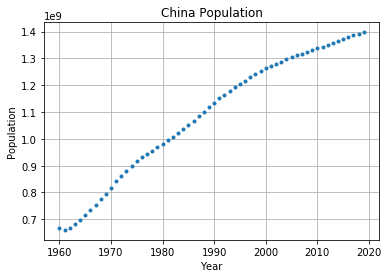

In [4]:
year=df['year'].values
pop=df['pop'].values
plt.plot(year,pop,'o',ms=3)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("China Population")
plt.grid()

## Q3.c

In [5]:
year_train=year[0:54]
year_test=year[54:]
pop_train=pop[0:54]
pop_test=pop[54:]

In [6]:
year_train_matrix=np.array([np.ones(54),year_train])
year_train_matrix_trans=year_train_matrix.transpose()
pop_train_trans=pop_train.transpose()
Z = np.matmul(year_train_matrix,year_train_matrix_trans)
Zinv=np.linalg.inv(Z)
Z2=np.matmul(Zinv,year_train_matrix)
Z3=np.matmul(Z2,pop_train_trans)
y_intercept=Z3[0]
slope=Z3[1]
def lr(x):
    return slope*x+y_intercept

## Q3.d
### i)

In [7]:
print("The slope =%f ,the y_intercept = %f"%(slope,y_intercept))

The slope =13986466.361724 ,the y_intercept = -26728908297.935646


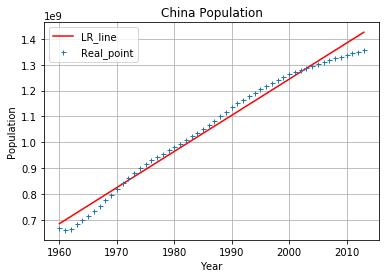

In [8]:
plt.plot(year_train,lr(year_train),'r')
plt.plot(year_train,pop_train,'+',ms=5)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("China Population")
plt.legend(["LR_line","Real_point"])
plt.grid()

### ii)

In [9]:
SSres=0
SStot=0
# the average of y_train
pop_train_average=np.average(pop_train)
# SSres
for i in range(0,len(pop_train)):
    SSres=SSres+((pop_train)[i]-lr(year_train[i]))**2
# SStot
for i in range(0,len(pop_train)):
    SStot=SStot+(pop_train[i]-pop_train_average)**2

R2=round((1-SSres/SStot),4)
print("The R2 coefficient =%f"% R2)

The R2 coefficient =0.982700


### iii)

In [10]:
MSE=SSres/len(year_train)
print("MSE of the estimator on the training data=%f"% MSE)

MSE of the estimator on the training data=835824080317132.000000


### iv)

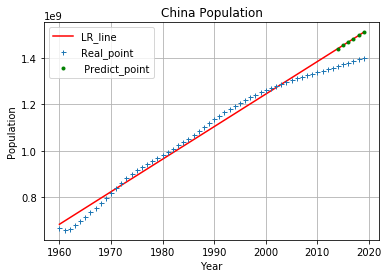

In [11]:
pop_pred=lr(year_test)
plt.plot(year,lr(year),'r')
plt.plot(year,pop,'+',ms=5)
plt.plot(year_test,pop_pred,'og',ms=3)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("China Population")
plt.legend(["LR_line","Real_point"," Predict_point"])
plt.grid()

### v)

In [12]:
from sklearn.preprocessing import normalize
year_train=np.mat(year_train)
year_test=np.mat(year_test)
pop_train=np.mat(pop_train)
pop_test=np.mat(pop_test)
year_train_scaled=normalize(year_train,norm='max')
year_test_scaled=normalize(year_test,norm='max')
pop_train_scaled=normalize(pop_train,norm='max')
pop_test_scaled=normalize(pop_test,norm='max')
year_train_scaled=year_train_scaled[0,:]
year_test_scaled=year_test_scaled[0,:]
pop_train_scaled=pop_train_scaled[0,:]
pop_test_scaled=pop_test_scaled[0,:]

In [13]:
import sklearn.linear_model as lm
lrp = lm.LinearRegression()
deg=1
s='-'
lrp.fit(np.vander(year_train_scaled,deg + 1),pop_train_scaled)
pop_pred = lrp.predict(np.vander(year_test_scaled, deg + 1))
coeff=np.append(lrp.coef_[:-1],lrp.intercept_)
print(f'Coefficients, degree {deg}:\n\t',' '.join(f'{c:.2f}' for c in coeff ))
Q=0
for i in range(0,6):
    Q=Q+(pop_test_scaled[i]-pop_pred[i])**2
print(f'       The mean squared errors: ',round(Q/6,7))

Coefficients, degree 1:
	 20.74 -19.69
       The mean squared errors:  0.0013894


## Q3.e

In [14]:
pred_2030=lr(2030)
pred_2050=lr(2050)
print("Estimate:\n 2030: %.0f\n 2050: %.0f" % (pred_2030,pred_2050))

Estimate:
 2030: 1663618416
 2050: 1943347744


__I think the forecast for 2030 is more accurate, but the forecast for 2050 is not accurate enough. Because the changes in the decade are relatively small, it is likely to fit the model predicted by the population from 1960 to 2013. But now there is a difference of 30 years from 2050. Compared to 1991, it is also 30 years away today. But in 1991, when the Internet was just born, there was a huge gap in the level of science and technology in 30 years. At the same time, because of geographic diseases and other uncertain habits Factors have intensified and become more difficult to predict.__

## Q3.f

Coefficients, degree 1:
	 13986466.36 -26728908297.95
       The mean squared errors:  1287299118878175.8
Coefficients, degree 2:
	 -125073.25 510902492.23 -520260368613.63
       The mean squared errors:  260451168109977.16
Coefficients, degree 3:
	 -1935.29 11408267.30 -22399232700.20 14648947340976.10
       The mean squared errors:  160469745310319.22
Coefficients, degree 4:
	 -0.71 3743.29 -5509122.02 -4160.10 3527723394841.79
       The mean squared errors:  161094423790223.2


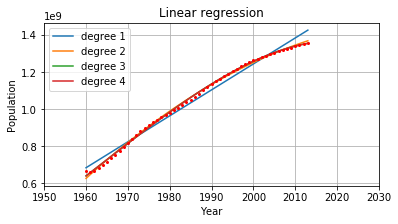

In [15]:
# Polybomial Linear Regressing
import scipy.stats as st
import sklearn.linear_model as lm
year_train=year[0:54]
year_test=year[54:]
pop_train=pop[0:54]
pop_test=pop[54:]
lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
for deg, s in zip([1,2,3,4],['-','-','-','-']):
    lrp.fit(np.vander(year_train,deg + 1),pop_train)
    pop_pred = lrp.predict(np.vander(year_train, deg + 1))
    ax.plot(year_train,pop_pred, s,label=f'degree {deg}')
    ax.legend(loc='best')
    ax.set_xlim(1950, 2030)
    coeff=np.append(lrp.coef_[:-1],lrp.intercept_)
    print(f'Coefficients, degree {deg}:\n\t',' '.join(f'{c:.2f}' for c in coeff ))
    Q=0
    for i in range(0,9):
        Q=Q+(pop_train[i]-pop_pred[i])**2
    print(f'       The mean squared errors: ',round(Q/9,7))
    

ax.plot(year_train, pop_train, 'or', ms=2)
ax.set_title("Linear regression")
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.grid()


__y= -1935.29*x^3+11408267.30*x^2-22399232700.20*x^1+14648947340976.10__

__I think the more accurate model is a polynomial model of degree 3. The polynomial model better fits the trend of the slowdown in China's population growth rate, which is in line with the biological K value conclusion.__

## Q3.g

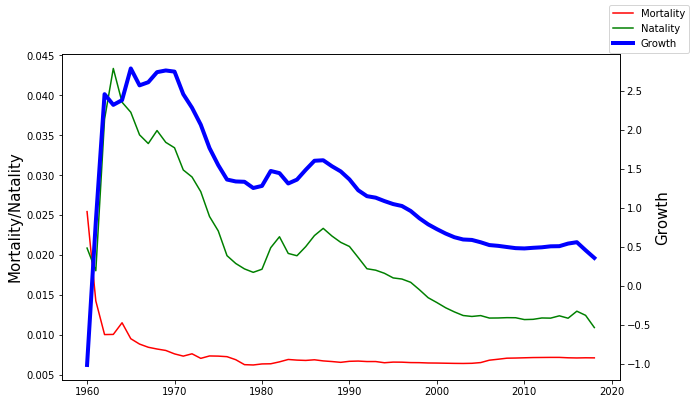

In [16]:
mortality=df['mortality'].values
natality=df['natality'].values
grow=df['grow'].values
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)
ax1.plot(year,mortality,'r')
ax1.plot(year,natality,'g')
ax1.set_ylabel('Mortality/Natality',fontdict={'weight': 'normal', 'size': 15})
            
ax2 = ax1.twinx() 
ax2.plot(year,grow,'b',linewidth=4)
ax2.set_ylabel('Growth',fontdict={'weight': 'normal', 'size': 15})

fig.legend(['Mortality','Natality','Growth' ],loc="upper right")

__The mortality rate of the Chinese population remained stable and at a relatively low level after falling to 1980. The birth rate has also shown a downward trend, and has stabilized around 2010, with a certain degree of fluctuation in the last two years. China's population growth rate has also declined over time. Based on this, it can be seen that China's population growth has crossed the K/2 value and is showing a slow growth trend, approaching K.__

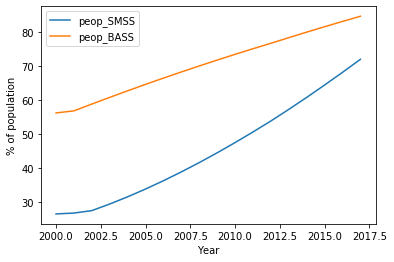

In [17]:
peop_SMSS=df['SH.STA.SMSS.ZS']
peop_BASS=df['SH.STA.BASS.ZS']
plt.plot(year,peop_SMSS)
plt.plot(year,peop_BASS)
plt.xlabel("Year")
plt.ylabel("% of population")
plt.legend(['peop_SMSS','peop_BASS'])


__The level of medical care in China is gradually improving, and the number of people covered by medical services continues to increase. This population growth provides a guarantee.__

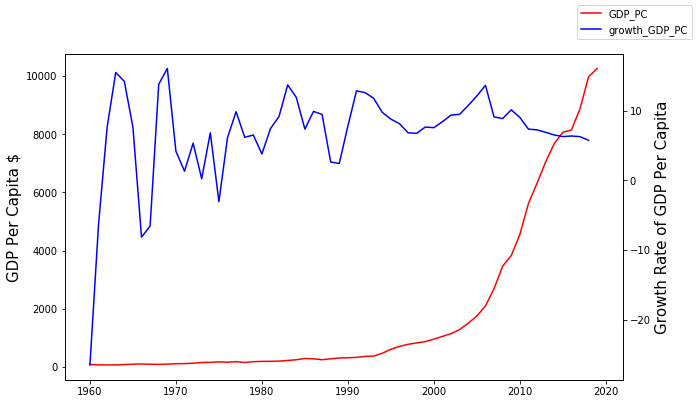

In [18]:
GDP_PC=df['GDP_per_capita'].values
growth_GDP_PC=df['growth_GDP_per_capita'].values
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)
ax1.plot(year,GDP_PC,'r')
ax1.set_ylabel('GDP Per Capita $',fontdict={'weight': 'normal', 'size': 15})

ax2 = ax1.twinx() 
ax2.plot(year,growth_GDP_PC,'b')
ax2.set_ylabel('Growth Rate of GDP Per Capita',fontdict={'weight': 'normal', 'size': 15})
fig.legend(['GDP_PC','growth_GDP_PC'])

  __Per capita GDP has increased substantially in the last 20 years, and productivity has been greatly developed. The demand for labor quantity has decreased, but the demand for labor quality has increased, which has led to a sharp decline in the birth rate.__

__In summary, I think that per capita GDP and residents' medical and health insurance can be added to the model as 3 factors, and more fitting predictions can be made through Multiple LR model__

       The mean squared errors of train:  15933370862.317762
       The mean squared errors of test:  8058151261558.645


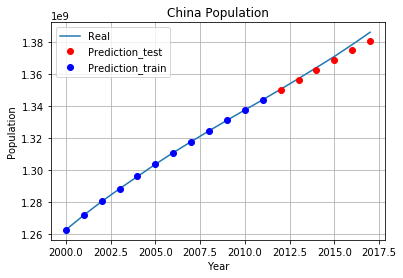

In [19]:
import sklearn.linear_model as lm
lrp = lm.LinearRegression()
year=df.iloc[40:58,0].values
pop=df.iloc[40:58,1].values
BASS=df.iloc[40:58,5].values
SMSS=df.iloc[40:58,6].values
GDP=df.iloc[40:58,7].values
year_train=np.mat(year[0:12]).T
pop_train=np.mat(pop[0:12]).T
BASS_train=np.mat(BASS[0:12]).T
SMSS_train=np.mat(SMSS[0:12]).T
GDP_train=np.mat(GDP[0:12]).T
year_test=np.mat(year[12:20]).T
pop_test=np.mat(pop[12:20]).T
BASS_test=np.mat(BASS[12:20]).T
SMSS_test=np.mat(SMSS[12:20]).T
GDP_test=np.mat(GDP[12:20]).T
ones_train=np.ones((12,1))
ones_test=np.ones((6,1))
x_test=np.hstack((year_test,BASS_test,SMSS_test,GDP_test,ones_test))
x_train=np.hstack((year_train,BASS_train,SMSS_train,GDP_train,ones_train))
lrp.fit(x_train,pop_train)
y_lrp_test = lrp.predict(x_test)
y_lrp_train = lrp.predict(x_train)

plt.plot(year,pop)
plt.plot(year_test,y_lrp_test,'ro')
plt.plot(year_train,y_lrp_train,'bo')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("China Population")
plt.legend(["Real","Prediction_test","Prediction_train"])
plt.grid()

Q_test=0
Q_train=0
for i in range(0,6):
    Q_test=Q_test+(pop_test[i]-y_lrp_test[i])**2
for i in range(0,12):
    Q_train=Q_train+(pop_train[i]-y_lrp_train[i])**2

print(f'       The mean squared errors of train: ',round(Q_train[0,0]/12,7))
print(f'       The mean squared errors of test: ',round(Q_test[0,0]/6,7))

||Linear Regression (degree=1) |Polynomial LR (degree=3) |Multiple LR|
|---|---|---|---|
|MSE(train)|8.36*10^14|1.60*10^14|1.59*10^10|

__Multiple LR is more fitting to China population forecast.__